# **Breast cancer evaluation - binary classification**
### **Abdallah Fekry**
**Model 12**

---

class 0 = Healthy

class 1 = Sick

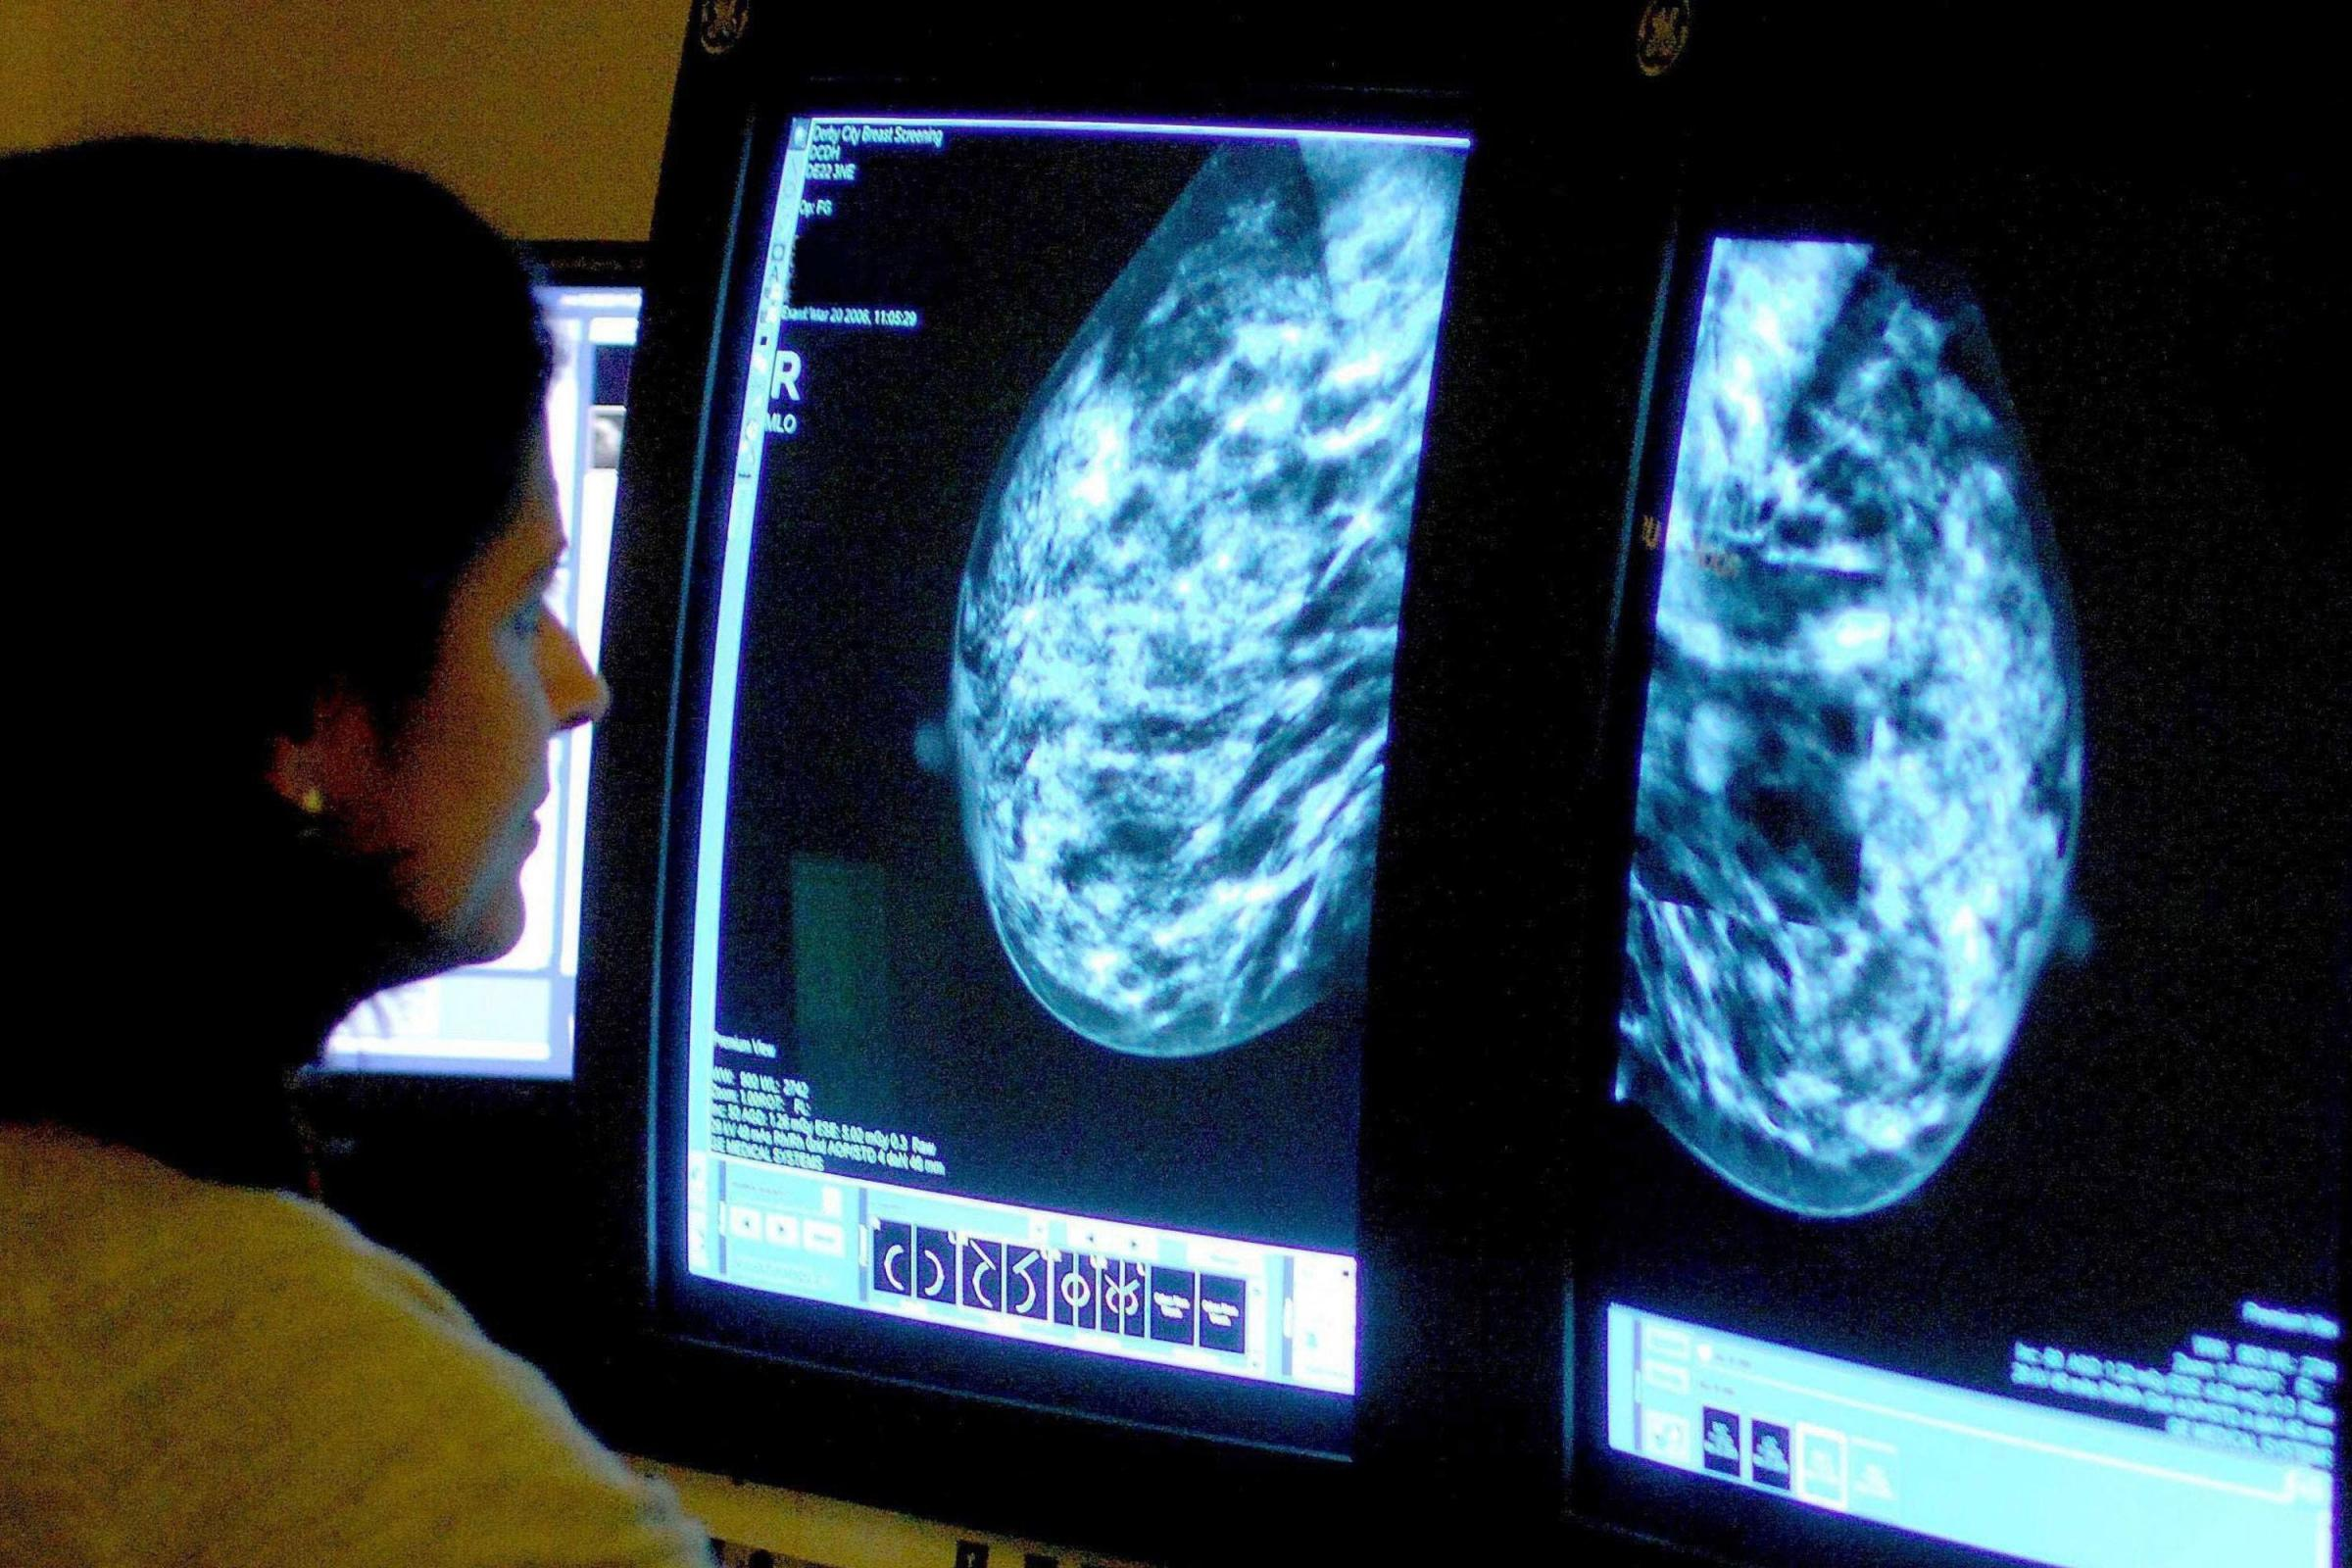

In [1]:
!pip install keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:
import keras
keras.__version__

'2.15.0'

In [4]:
classes = {0 : 'Healthy',
           1 : 'Sick with Breast Cancer'}

In [5]:
classes[0]

'Healthy'

importing libraries

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/kaggle/input/mri-image-brest-cancer/Breast Cancer Patients MRI/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)
test_data = train_datagen.flow_from_directory('/kaggle/input/mri-image-brest-cancer/Breast Cancer Patients MRI/validation',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False)

Found 1400 images belonging to 2 classes.
Found 680 images belonging to 2 classes.


In [9]:
train_data.image_shape

(224, 224, 3)

In [10]:
np.unique(test_data.labels)

array([0, 1], dtype=int32)

In [11]:
train_data.class_indices

{'Healthy': 0, 'Sick': 1}

In [12]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [13]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 134264641 (512.18 MB)
Trainable params: 11

In [15]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy','Recall'])
from tensorflow.keras.callbacks import EarlyStopping
results = model.fit(train_data, epochs=100, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=EarlyStopping(patience=5,monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/100


I0000 00:00:1709724799.909412     142 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


44/44 [==============================] - 34s 477ms/step - loss: 4.4922 - accuracy: 0.6207 - recall: 0.6286 - val_loss: 0.2943 - val_accuracy: 0.8897 - val_recall: 0.8882
Epoch 2/100
44/44 [==============================] - 9s 214ms/step - loss: 0.1202 - accuracy: 0.9550 - recall: 0.9571 - val_loss: 0.3270 - val_accuracy: 0.8985 - val_recall: 0.8676
Epoch 3/100
44/44 [==============================] - 10s 218ms/step - loss: 0.0414 - accuracy: 0.9900 - recall: 0.9886 - val_loss: 0.4025 - val_accuracy: 0.9309 - val_recall: 0.9500
Epoch 4/100
44/44 [==============================] - 10s 217ms/step - loss: 0.0064 - accuracy: 0.9986 - recall: 0.9986 - val_loss: 0.5665 - val_accuracy: 0.9412 - val_recall: 0.9647
Epoch 5/100
44/44 [==============================] - 9s 205ms/step - loss: 0.0532 - accuracy: 0.9793 - recall: 0.9843 - val_loss: 0.3568 - val_accuracy: 0.9368 - val_recall: 0.9647
Epoch 6/100
44/44 [==============================] - 12s 266ms/step - loss: 0.0494 - accuracy: 0.9779 - 

In [17]:
loss , acc, recall = model.evaluate(test_data)

22/22 [==============================] - 3s 121ms/step - loss: 0.4994 - accuracy: 0.9471 - recall: 0.9824


In [18]:
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss ,'\nRecall = ',round(recall*100,2),'%',sep='')

Test accuracy = 94.71%
Loss = 0.49938151240348816
Recall = 98.24%


In [19]:
results.history['val_loss']

[0.294284850358963,
 0.32697761058807373,
 0.4025208353996277,
 0.5665185451507568,
 0.3567991852760315,
 0.6483678221702576,
 0.49938151240348816,
 0.5000618696212769,
 0.5093270540237427,
 0.5219393372535706,
 0.5311218500137329,
 0.5415872931480408]

In [20]:
results.history['val_accuracy']

[0.8897058963775635,
 0.8985294103622437,
 0.9308823347091675,
 0.9411764740943909,
 0.9367647171020508,
 0.9441176652908325,
 0.9470587968826294,
 0.9441176652908325,
 0.9441176652908325,
 0.9441176652908325,
 0.9411764740943909,
 0.9411764740943909]

In [21]:
i = results.history['val_loss'].index(loss)
i

6

In [22]:
results.history['val_accuracy'][i]

0.9470587968826294

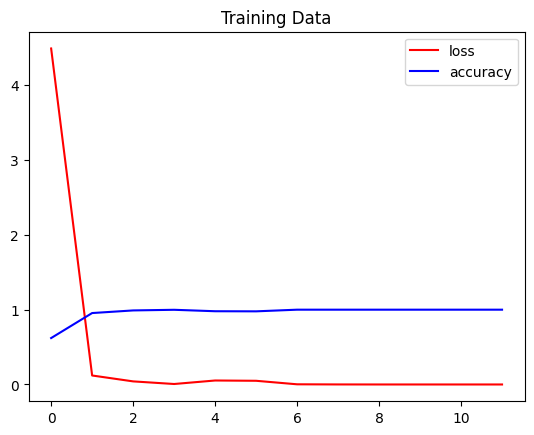

In [26]:
fig = plt.figure()
plt.plot(results.history['loss'], c='red', label='loss')
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
# plt.plot(results.history['recall'], c='green', label='recall')
plt.title("Training Data")
plt.legend(loc="upper right")
plt.show()

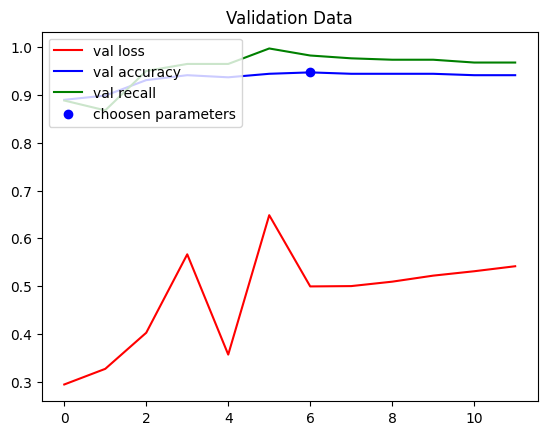

In [27]:
fig = plt.figure()
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.plot(results.history['val_recall'], c='green', label='val recall')
plt.scatter(i ,results.history['val_accuracy'][i], c='blue', label='choosen parameters', marker='o')
plt.title("Validation Data")
plt.legend(loc="upper left")
plt.show()

In [28]:
yp = (model.predict(test_data)>=0.5).astype(int)
yp.shape

22/22 [==============================] - 3s 121ms/step


(680, 1)

In [29]:
yp = yp.reshape(-1,)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Healthy Sample


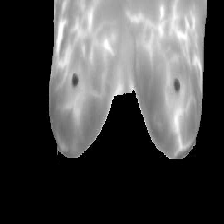

In [30]:
print("Healthy Sample")
H = load_img('/kaggle/input/mri-image-brest-cancer/Breast Cancer Patients MRI/validation/Healthy/H_100.jpg',target_size=(224,224))
# plt.imshow()
H

Sick Sample


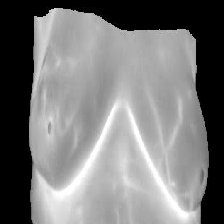

In [31]:
print('Sick Sample')
S = load_img('/kaggle/input/mri-image-brest-cancer/Breast Cancer Patients MRI/validation/Sick/S_34.jpg',target_size=(224,224))
# plt.imshow(img_normal)
S

Text(0.5, 1.0, 'Sick')

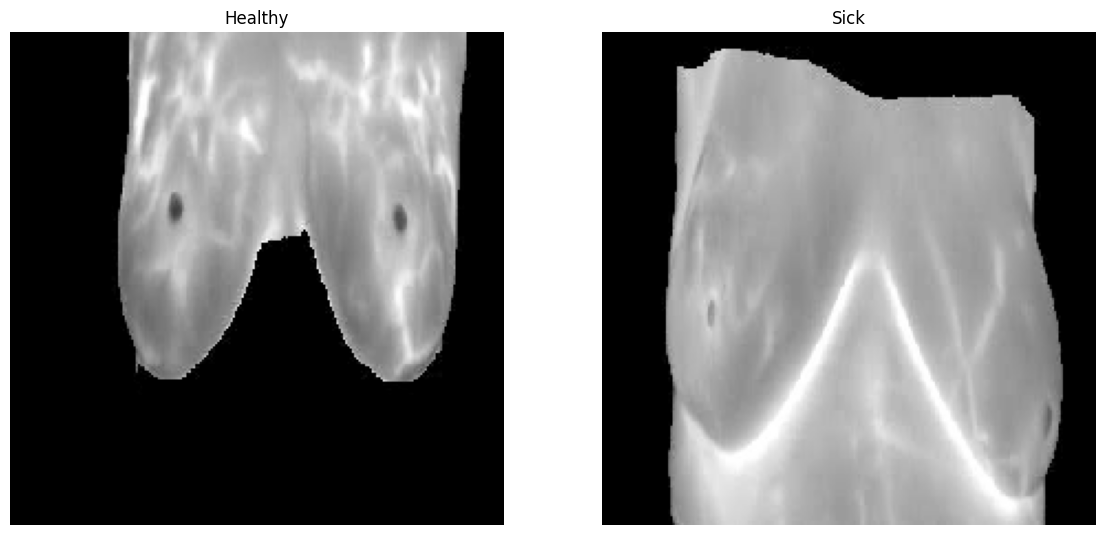

In [32]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(H)
plt.title('Healthy')
fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(S)
plt.title('Sick')

In [33]:
H = img_to_array(H)
S = img_to_array(S)
H = H/255
S = S/255
H = H.reshape(1,224,224,3)
S = S.reshape(1,224,224,3)
S.shape

(1, 224, 224, 3)

In [34]:
p1 = (model.predict(H)>=0.5).astype(int)[0][0]

print("Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 1s 1s/step
Class 0: Healthy


In [35]:
p1 = (model.predict(S)>=0.5).astype(int)[0,0]

print("Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 19ms/step
Class 1: Sick with Breast Cancer


In [36]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,Healthy/H_100.jpg,0,0
1,Healthy/H_101.jpg,0,0
2,Healthy/H_102.jpg,0,0
3,Healthy/H_103.jpg,0,0
4,Healthy/H_104.jpg,0,0
...,...,...,...
675,Sick/S_769.jpg,1,1
676,Sick/S_770.jpg,1,1
677,Sick/S_771.jpg,1,1
678,Sick/S_772.jpg,1,1


In [37]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
m = confusion_matrix(test_data.labels,yp)
m

array([[310,  30],
       [  6, 334]])

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

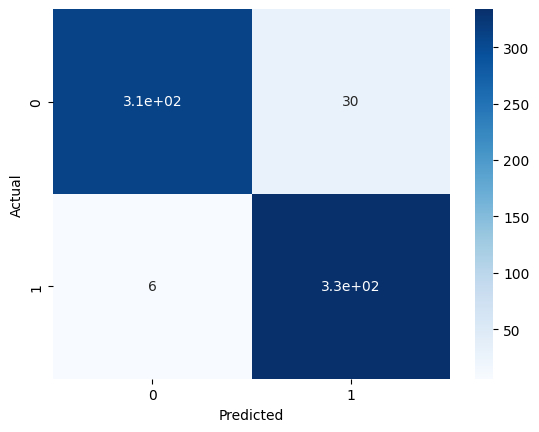

In [39]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

---

In [40]:
model.save('model9.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'model9.h5')

/kaggle/working


/kaggle/working/model9.h5